In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization

In [3]:
X, Y = datasets.load_iris(return_X_y=True)
U = decomposition.PCA(n_components=2).fit_transform(X)

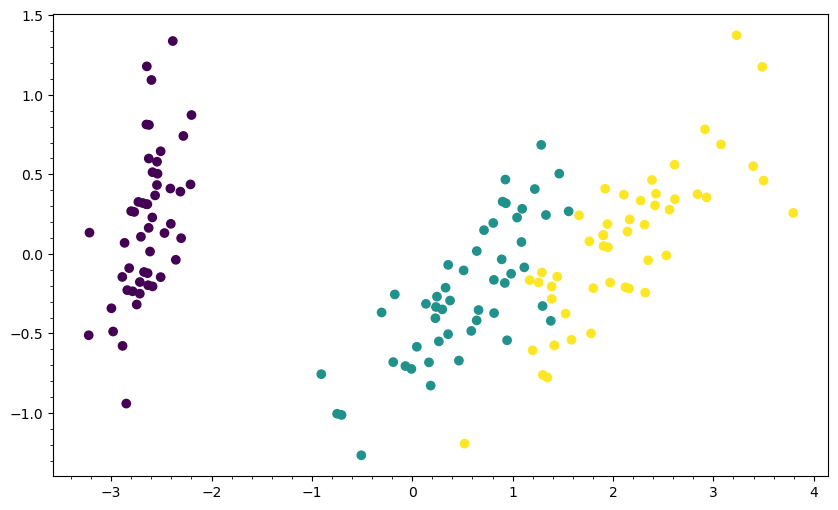

In [4]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U[:,0], U[:,1], c=Y, s=36)
plt.minorticks_on()
plt.show()

In [5]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

In [6]:
def calc_zz(mod, xr, yr):
    xrange = np.linspace(xr[0], xr[1], 101)
    yrange = np.linspace(yr[0], yr[1], 101)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

In [7]:
mm = MarginMaximization(Hinge(0.), tol=1.0e-8)

K: 1 w: [0.993 0.115] c: 0.9026556103385561 s: 0.5169819263225702
K: 3 w: [0.975 0.223] c: 1.128999144704187 s: 0.4038027451399445
K: 6 w: [0.964 0.266] c: 1.121988627538752 s: 0.7889552282046075
K: 13 w: [0.975 0.223] c: 1.0478497053447304 s: 1.2214893113390874
K: 15 w: [0.704 0.710] c: 0.9804612000184033 s: 2.7373274124021316
K: 17 w: [0.964 0.266] c: 1.1316782479819678 s: 16.654958377795786


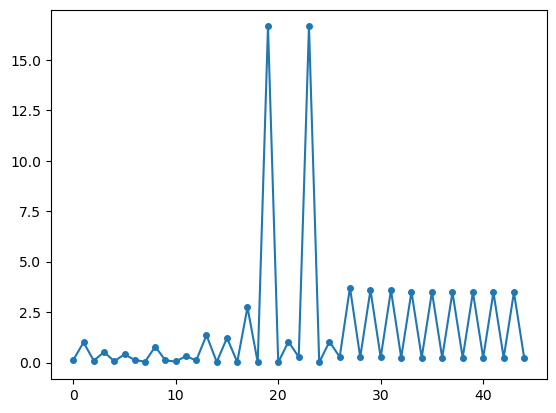

1


In [8]:
mm.fit(U2, Y2)
plt.plot(mm.lvals, marker='o', markersize=4)
plt.show()
print(mm.K)

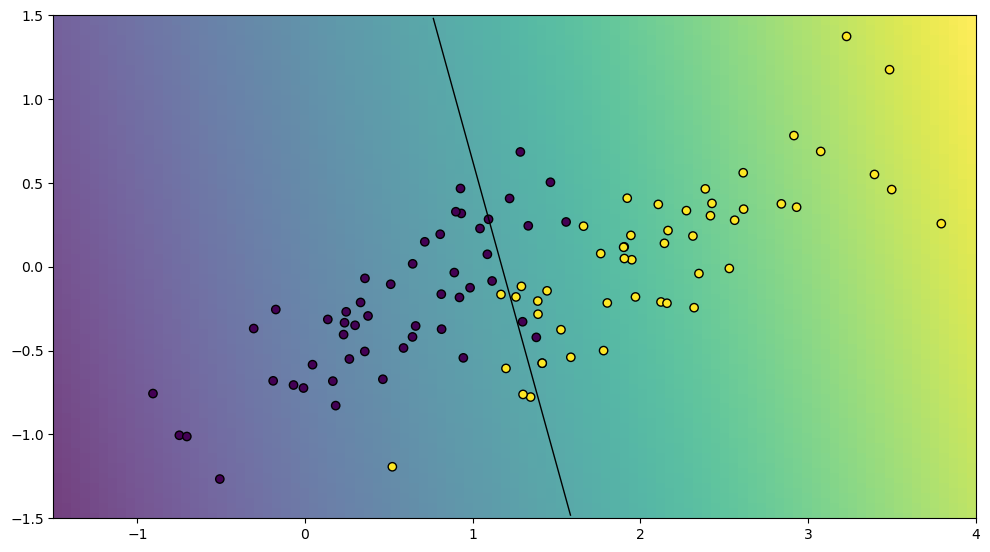

In [9]:
ZZ = calc_zz(mm, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 21), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.colorbar(cb, )
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

In [10]:
accuracy_score(Y2, np.sign(mm.evaluate(U2)))

0.88